In [1]:
from gerrychain import Graph
graph = Graph.from_json('ChainUtilityData/graph_august.json')

In [2]:
import pandas as pd
import numpy as np

In [3]:
precincts = pd.DataFrame(columns=['Population', 'G_DEM', 'G_REP', 'SEN_DEM', 'SEN_REP', 'COMB_DEM', 'COMB_REP'], index = range(len(graph)))

In [4]:
for n in graph.nodes:
    precincts.iloc[n] = [graph.nodes[n]['POP100'], graph.nodes[n]['G_DEM'], graph.nodes[n]['G_REP'], graph.nodes[n]['SEN_DEM'], graph.nodes[n]['SEN_REP'], graph.nodes[n]['COMB_DEM'], graph.nodes[n]['COMB_REP']]

In [5]:
for i in range(len(precincts)):
    try:
        precincts.loc[i, 'G'] = precincts.loc[i, 'G_DEM']/(precincts.loc[i, 'G_REP']+precincts.loc[i, 'G_DEM'])
    except ZeroDivisionError:
        precincts.loc[i, 'G'] = 1 
    try:
        precincts.loc[i, 'SEN'] = precincts.loc[i, 'SEN_DEM']/(precincts.loc[i, 'SEN_REP']+precincts.loc[i, 'SEN_DEM'])
    except ZeroDivisionError:
        precincts.loc[i, 'SEN'] = 1
    try:
        precincts.loc[i, 'COMB'] = precincts.loc[i, 'COMB_DEM']/(precincts.loc[i, 'COMB_REP']+precincts.loc[i, 'COMB_DEM'])
    except ZeroDivisionError:
        precincts.loc[i, 'COMB'] = 1

In [7]:
ideal = precincts['Population'].sum()/4

rep_key = 'COMB_REP'
dem_key = 'COMB_DEM'
sort_key = 'COMB'

sort = np.argsort(precincts[sort_key].values)

precincts = precincts.sort_values(sort_key, ascending=False)

flag = True
for i, val in enumerate(precincts['Population'].cumsum().values):
    if val > ideal and flag:
        i1 = i
        flag = False
    if val > 2*ideal:
        i2 = i
        break

print(i1, i2)

if precincts.iloc[:i1][rep_key].sum() < precincts.iloc[:i1][dem_key].sum():
    print(True)
else:
    print(False)
    
if precincts.iloc[i1:i2][rep_key].sum() < precincts.iloc[i1:i2][dem_key].sum():
    print(True)
else:
    print(False)

885 1452
True
False


In [9]:
from plotting import *

In [16]:
precincts['G']

2642    1.0
1851    1.0
1928    1.0
1917    1.0
1896    1.0
       ... 
689     0.0
605     0.0
568     0.0
175     0.0
978     0.0
Name: G, Length: 2643, dtype: float64

In [21]:
precincts.columns

Index(['Population', 'G_DEM', 'G_REP', 'SEN_DEM', 'SEN_REP', 'COMB_DEM',
       'COMB_REP', 'G', 'SEN', 'COMB'],
      dtype='object')

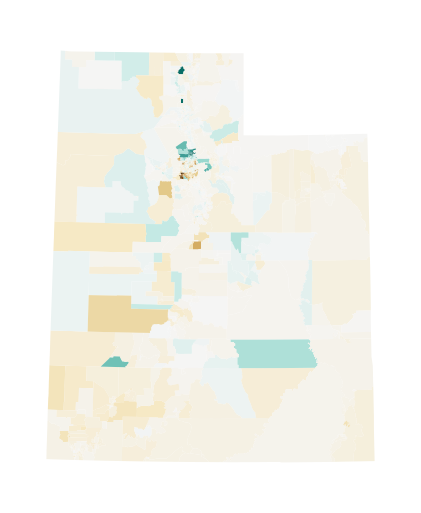

In [24]:
plot_district_map(precincts['SEN']-precincts['G'], cmap='BrBG')
# blue = Herbert
# brown = Lee

In [ ]:
precincts.iloc[:i1][dem_key].sum()/(precincts.iloc[:i1][rep_key].sum() + precincts.iloc[:i1][dem_key].sum())